### names 폴더에 있는 데이터
1. 2000 ~ 2009년 출생한 남, 여 파일 읽어서 concat
2. 출생한 전체 남, 여 합 출력
3. 남, 여 출생 추이

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings(action='ignore')


In [10]:
df_list = []
a = [i for i in range(10)]

for x in sorted(glob.glob('../../data/names/yob200*.txt')):
    temp = pd.read_csv(x, names=['names','sex',str(200)+str(a[0])]) # 파일을 읽어오기
    del a[0]
    df_list.append(temp) # 읽어온 파일들을 빈리스트에 넣어주기 
baby = df_list[0]
for i in range(1, 10):
    baby = baby.merge(df_list[i], how='outer')
baby
baby.fillna(0)

,names,sex,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Emily,F,25956.0,25057.0,24464.0,25691.0,25037.0,23940.0,21404.0,19355.0,17434.0,15352.0
1,Hannah,F,23082.0,20716.0,18822.0,17637.0,15605.0,14845.0,14544.0,13312.0,9563.0,7572.0
2,Madison,F,19968.0,22164.0,21773.0,20199.0,20622.0,19568.0,18626.0,17961.0,17032.0,15239.0
3,Ashley,F,17997.0,16527.0,15344.0,14514.0,14373.0,13274.0,12346.0,11425.0,9403.0,7813.0
4,Sarah,F,17702.0,15899.0,14760.0,13760.0,12737.0,11532.0,11150.0,9992.0,9045.0,7780.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60353,Zlatan,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
60354,Zykell,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
60355,Zyran,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
60356,Zyreion,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [40]:
total = baby.shape[0]
total

60358

In [76]:
F_count = baby[baby['sex']=='F'].count().sum()
M_count = baby[baby['sex']=='M'].count().sum()
Total = [F_count, M_count]
Total
print(F_count+M_count)

445945


In [75]:
F_sum = 0
M_sum = 0
for i in range(10):
    F_sum += df_list[i].sex.value_counts()[0]
    M_sum += df_list[i].sex.value_counts()[1]
print(F_sum)
print(M_sum)
print(F_sum + M_sum)
T_sum = [F_sum, M_sum]

191420
133809
325229


([<matplotlib.patches.Wedge at 0x1f4a43ab3a0>,
 [Text(-1.0576912018226676, -0.3021412278834537, 'F'),
  Text(1.0576912301111663, 0.3021411288552552, 'M')],
 [Text(-0.576922473721455, -0.16480430611824748, '58.9%'),
  Text(0.5769224891515452, 0.16480425210286645, '41.1%')])

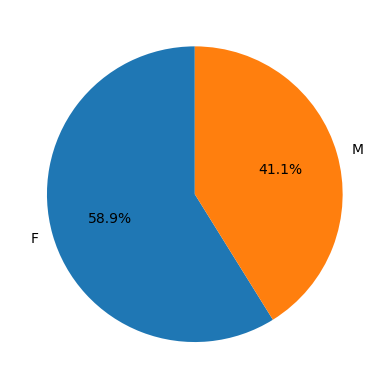

In [77]:
plt.pie(T_sum, labels=['F', 'M'], 
        autopct='%.1f%%',
        startangle=90,
        counterclock=True)

In [70]:
for i in range(10):
    F_sum += df_list[i].sex.value_counts()[0]
    M_sum += df_list[i].sex.value_counts()[1]
